In [ ]:
#All notes are commented out and are available below. This shows how I was able to come up with the data. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Demographic_Data.csv')

In [ ]:
#showing heading for the data frame
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [ ]:
data.columns

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')

In [ ]:
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [ ]:
data = data.drop_duplicates()

In [ ]:
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


In [ ]:
#This is making sure that all null and duplicates are gone

In [ ]:
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

In [ ]:
#What about Region and in-store? Are those those categories? Something to think about!

In [ ]:
#Discretization process

In [ ]:
#Region and in-store would be incorrect in the description because
#it's calculating it instead of letting us know 
#which region or store they belong to. 
##Need to sort with Region and in-store 
#not included for calculations but listed 

In [ ]:
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


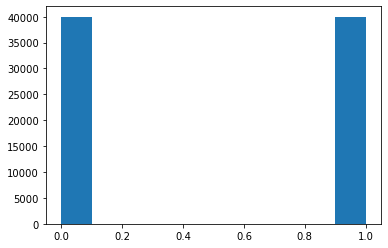

In [ ]:
plt.hist(data['in-store'])
plt.show()
#independent variable is in-store

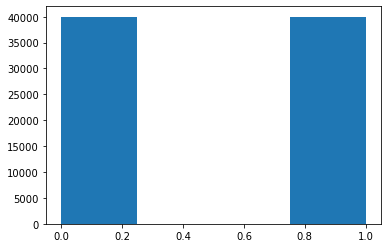

In [ ]:
plt.hist(data['in-store'], bins=4)
plt.show()

In [ ]:
# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

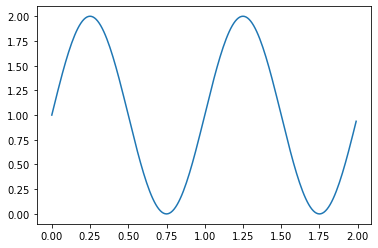

In [ ]:
fig, ax = plt.subplots()
ax.plot(t, s)
plt.show()

In [ ]:
data_sample = data.sample(100)

In [ ]:
x = data_sample['age']
y = data_sample['amount']

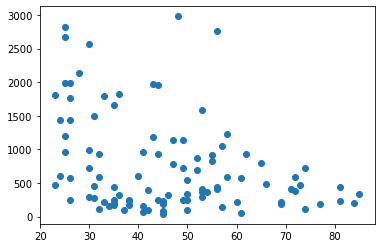

In [ ]:
plt.scatter(x,y, marker='o')
plt.show()

In [ ]:
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


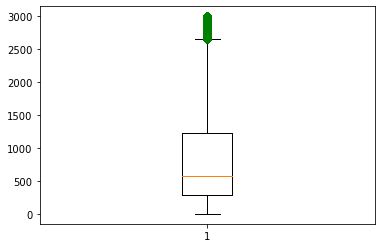

In [ ]:
A = data['amount']
# change outlier point symbols
plt.boxplot(A,0,'gD')
plt.show()

In [ ]:
corr_mat = data.corr()
print(corr_mat)

          in-store       age     items    amount    region
in-store  1.000000 -0.178180 -0.003897 -0.085573 -0.133171
age      -0.178180  1.000000  0.000657 -0.282033 -0.235370
items    -0.003897  0.000657  1.000000  0.000384 -0.001904
amount   -0.085573 -0.282033  0.000384  1.000000  0.403486
region   -0.133171 -0.235370 -0.001904  0.403486  1.000000


In [ ]:
# possible correlation between region and amount

In [ ]:
cov_mat = data.cov()
print(cov_mat)

           in-store          age     items         amount      region
in-store   0.250003    -1.400071 -0.004017     -30.860425   -0.075019
age       -1.400071   246.966189  0.021270   -3196.782841   -4.167305
items     -0.004017     0.021270  4.248751       0.570791   -0.004421
amount   -30.860425 -3196.782841  0.570791  520221.252295  327.874873
region    -0.075019    -4.167305 -0.004421     327.874873    1.269321


In [ ]:
###End of tutorial##

In [ ]:
print(data)

       in-store  age  items   amount  region
0             0   37      4   281.03       2
1             0   35      2   219.51       2
2             1   45      3  1525.70       4
3             1   46      3   715.25       3
4             1   33      4  1937.50       1
...         ...  ...    ...      ...     ...
79995         1   71      3   558.82       1
79996         0   59      7  1932.00       3
79997         0   54      1   414.16       2
79998         1   49      4   335.32       1
79999         1   30      1   527.12       3

[79979 rows x 5 columns]


In [ ]:
print (data.amount)

0         281.03
1         219.51
2        1525.70
3         715.25
4        1937.50
          ...   
79995     558.82
79996    1932.00
79997     414.16
79998     335.32
79999     527.12
Name: amount, Length: 79979, dtype: float64


In [ ]:
#Do customers in different regions spend more per transaction? 
#Which regions spend the most/least?

In [ ]:
#We need to find the average for each region, use groupby to find this
data.groupby('region').mean()

,in-store,age,items,amount
region,,,,
1,1.000000,43.704132,4.510283,744.990939
2,0.000000,56.609083,4.512804,252.097741
3,0.611056,45.646944,4.494000,917.969637
4,0.500000,38.752424,4.503771,1283.938357


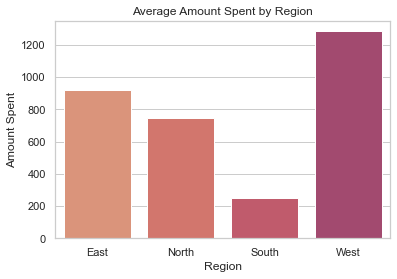

In [ ]:
#set y labels to region names by using new variable
values = ["North" if x == 1 else 
          "South" if x == 2 else 
          "East" if x == 3 else 
          "West" if x == 4 else 
          x for x in data.region]

#set new variable to use mean per region using new region names
datag = data.groupby([values])['amount'].mean()
#Set Seaborn color and style
sns.set_theme(style="whitegrid", palette="flare")

#Seaborn code to call bar plot
sns.barplot(x=datag.index, y=datag)

#label x, y and title of bar plot
plt.xlabel("Region")
plt.ylabel("Amount Spent")
plt.title("Average Amount Spent by Region")
#Neatly display bar plot
plt.show()

In [ ]:
#Yes, region 4 (West region) spends the most and region 2 (South region) spends the least

In [ ]:
#Is there a relationship between the number of items purchased and amount spent?

In [ ]:
#find the average of amount spent per item using groupby
data.groupby('items').mean()

,in-store,age,amount,region
items,,,,
1,0.501667,45.968416,825.401751,2.690647
2,0.496721,45.724832,846.956834,2.679989
3,0.504876,45.578530,836.594085,2.681090
4,0.501984,45.711747,829.619594,2.652148
5,0.504585,45.768717,833.973730,2.679160
6,0.503342,45.917267,835.332638,2.665770
7,0.489012,45.820851,830.026801,2.688203
8,0.497236,45.610055,851.268593,2.666724


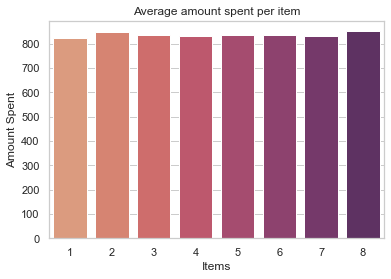

In [ ]:
#set new group mean for amount by item
datag1 = data.groupby(['items'])['amount'].mean()

#Seaborn code to call bar plot, using flare color
sns.barplot(x=datag1.index, y=datag1, palette="flare")
#label x, y and title of bar plot
plt.xlabel("Items")
plt.ylabel("Amount Spent")
plt.title("Average amount spent per item")
#Neatly display bar plot
plt.show()

In [ ]:
#mention that there is little to no correlation between the two
corr_mat = data.corr()
print(corr_mat)

          in-store       age     items    amount    region
in-store  1.000000 -0.178180 -0.003897 -0.085573 -0.133171
age      -0.178180  1.000000  0.000657 -0.282033 -0.235370
items    -0.003897  0.000657  1.000000  0.000384 -0.001904
amount   -0.085573 -0.282033  0.000384  1.000000  0.403486
region   -0.133171 -0.235370 -0.001904  0.403486  1.000000


In [ ]:
#No, the amount seems to be around the same 
#regardless of the number of items purchased
#Also, correlation shows 0.000384 which means there is very little correlation between the two